### Neshyba, 2023

# Path Independence as an existence test

## The two-path test of whether a function is a state function
How do we test, in general, whether an alleged state function really is a state function? One approach is to literally test for path-independence of integrals of a given differential equation of state. For example, suppose you are considering these two differential equations:

$$
dA = \frac 1 {T^2} dT + \frac 1 {TP} dP \ \ \ \ (1)
$$

and

$$
dB = P dT + T dP \ \ \ \ (2)
$$

Then we could conclude that $A(T,P)$ really is a state function if we

1. Constructed one surface by integrating the slopes *temperature-first*, followed by integrating over the pressure. 
1. Constructed another surface by integrating the slopes *pressure-first,* then over temperature. 

If you got the same surface, you could conclude that changes in the function when you cruise through state space really are path-independent -- which in turn would mean that the function $A(T,P)$ really exists. Similar comments would apply to $B(T,P)$, of course.

## A numerical approach
This is a lot easier than you might think, from a numerical perspective, with the help of the function PL.Integrator. Specifically, if you want PL.Integrator to integrate of *temperature* first, specify "axis=0" at the end of the argument list. If you want to make it *pressure-first,* specify "axis=1." If it turns out that the resulting difference in $A$ is the same for these two paths, you'd conclude that $A(T,P)$ is a state function (or, equivalently, "$A(T,P)$ exists." Similarly for $B$.

## Learning Goal
1. I can use the cross-integration method to determine whether an alleged thermodynamic function actually exists.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.append('/home'); import PchemLibrary as PL
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

### State space (this will work for both A and B)
The code below loads in a T/P state space.

In [3]:
Tgrid,Pgrid = PL.Statespace([200,400,50],[1,10,51])
Tgrid = AssignQuantity(Tgrid,'K')
Pgrid = AssignQuantity(Pgrid,'bar')

### Investigating the existence of $A(T,P)$
The code below constructs candidate state function "$A$" from the coefficients in front of $dT$ and $dP$ in Eq. (1).

/home/PchemLibrary.py:382: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[i,:] = integral_along_y


<IPython.core.display.Javascript object>


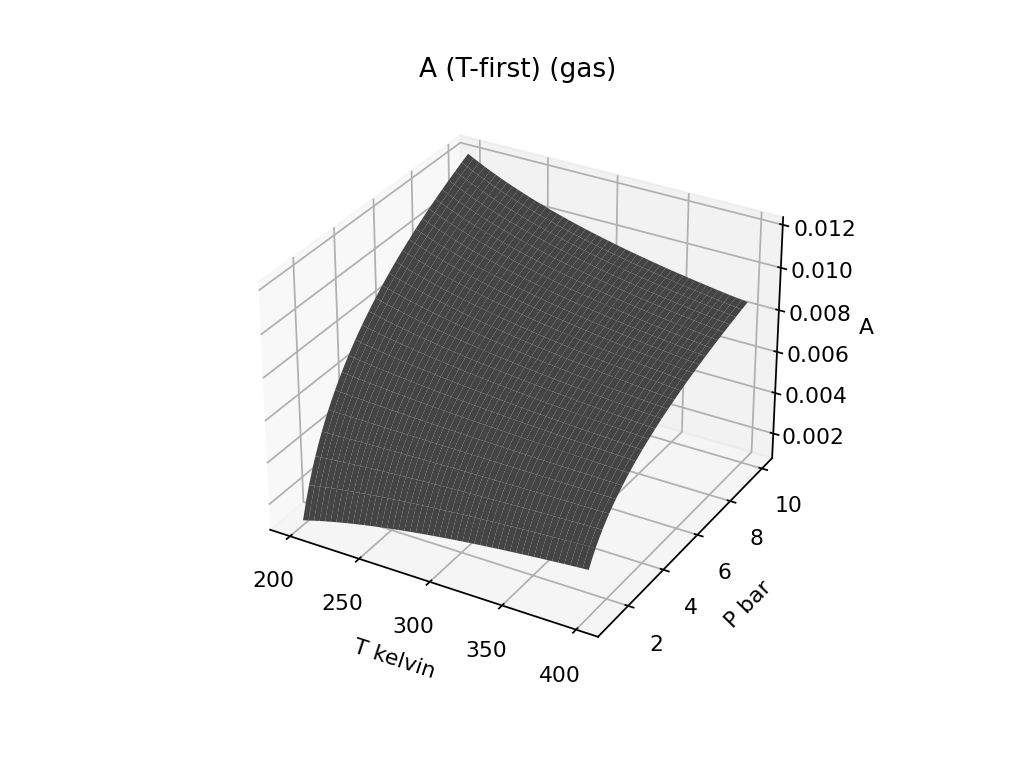

/home/PchemLibrary.py:391: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  Fgrid[:,i] = integral_along_x


<IPython.core.display.Javascript object>


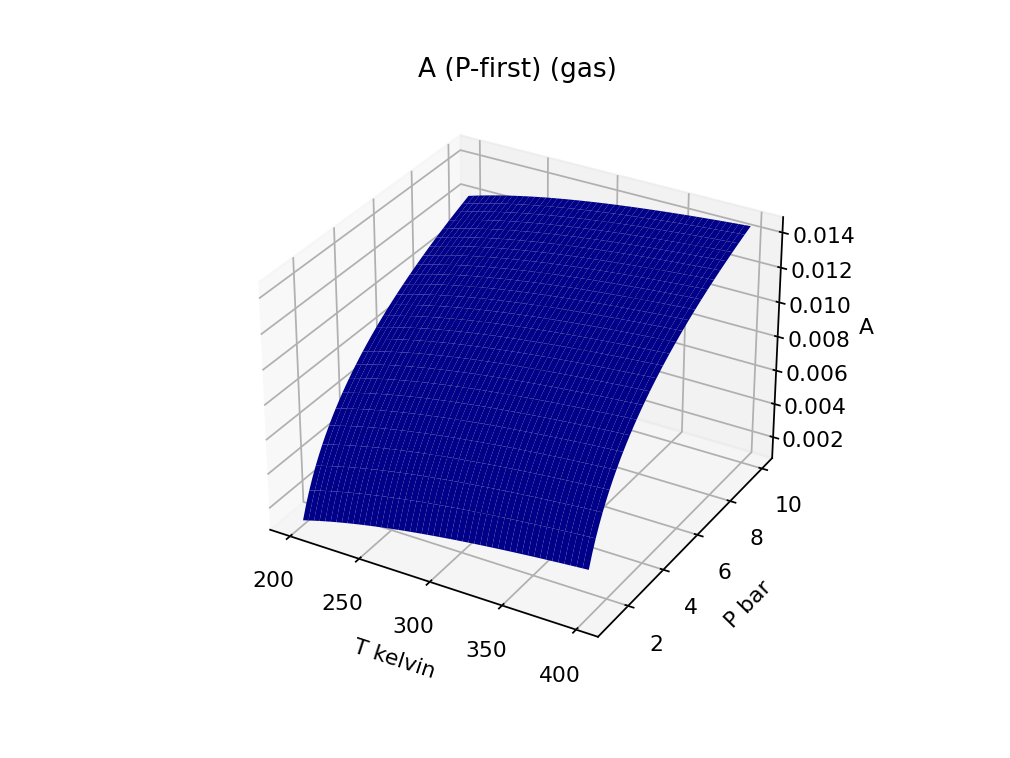

<Axes3DSubplot:title={'center':'A (P-first) (gas)'}, xlabel='T kelvin', ylabel='P bar'>

In [4]:
# Prepping the labels
xlabel = "T "+str(Tgrid.units)
ylabel = "P "+str(Pgrid.units)
zlabel = "A"
llist = [xlabel, ylabel, zlabel]

# Getting the coefficients according to Eq. (1)
dAdT = 1/Tgrid**2
dAdP = 1/(Tgrid*Pgrid)

# Integrate with respect to temperature first, then pressure (that's what "axis=0 does")
A_Tfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity, axis=0)
PL.plot_surface1(Tgrid, Pgrid, A_Tfirst, color='gray', title='A (T-first) (gas)',labellist=llist)

# Now integrate with respect to pressure first, then temperature ("axis=1"), and display
### BEGIN SOLUTION
A_Pfirst = PL.Integrator([Tgrid, Pgrid], dAdT, dAdP, AssignQuantity, axis=1)
PL.plot_surface1(Tgrid, Pgrid, A_Pfirst, color='blue', title='A (P-first) (gas)', labellist=llist)
### END SOLUTION

### Pause for analysis
If it looks like these two functions are the same, then we'd conclude that $A(T,P)$ exists. If they're different then $A(T,P)$ does not exist (it's a "pretender!"). What do you think?

### BEGIN SOLUTION
### END SOLUTION

### Investigating the existence of $B(T,P)$
In the cell below, construct candidate state function "$B$" from the coefficients in front of $dT$ and $dP$ in Eq. (2).

<IPython.core.display.Javascript object>


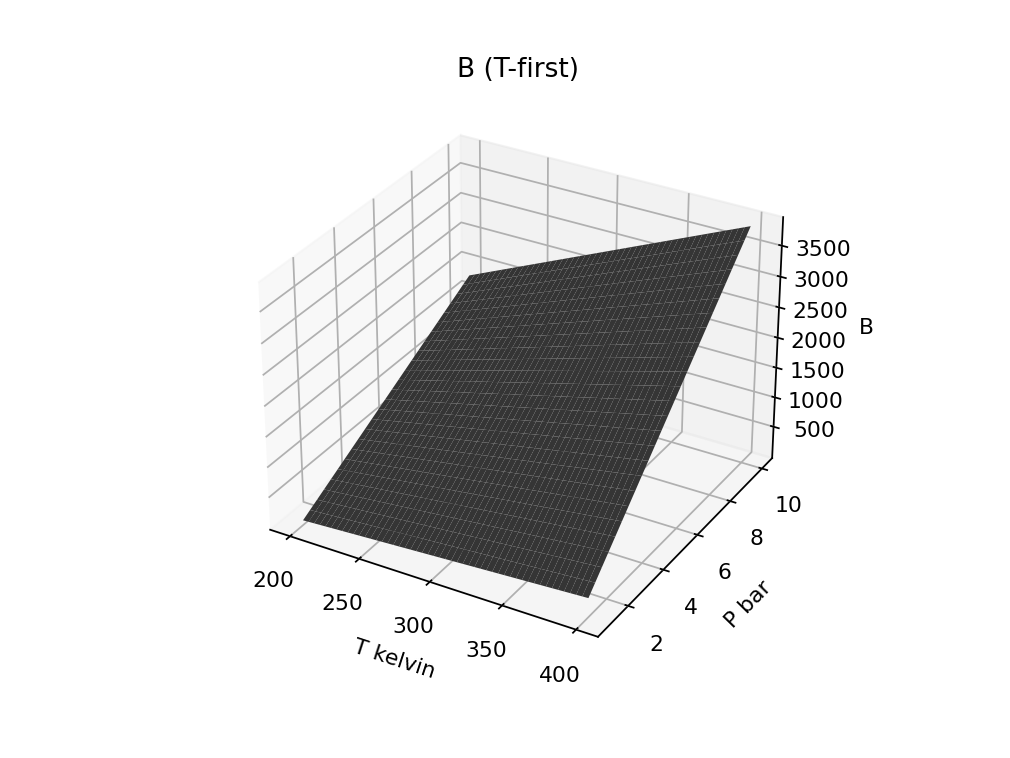

<IPython.core.display.Javascript object>


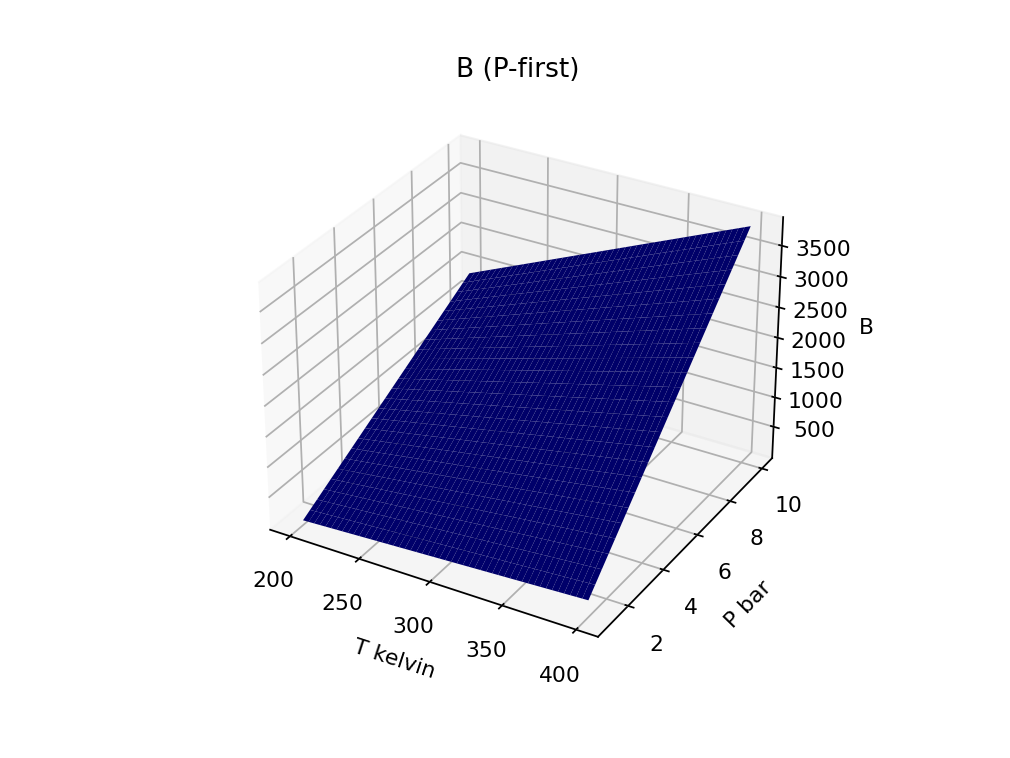

In [5]:
# Checking out B
### BEGIN SOLUTION

# Prepping the labels
zlabel = "B"
llist = [xlabel, ylabel, zlabel]

# Getting the slopes
dBdT = Pgrid
dBdP = Tgrid

# Integrating
B_Tfirst = PL.Integrator([Tgrid, Pgrid], dBdT, dBdP, AssignQuantity)
B_Pfirst = PL.Integrator([Tgrid, Pgrid], dBdT, dBdP, AssignQuantity, axis=1)

# Graphing
ax = PL.plot_surface1(Tgrid, Pgrid, B_Tfirst, color='gray', title='B (T-first)',labellist=llist)
ax = PL.plot_surface1(Tgrid, Pgrid, B_Pfirst, color='blue', title='B (P-first)',labellist=llist)

### END SOLUTION

### Pause for analysis
If it looks like these two functions are the same, then we'd conclude that $B(T,P)$ exists. If they're different then $B(T,P)$ does not exist (it's a "pretender!"). What do you think?

### BEGIN SOLUTION
### END SOLUTION

### Refresh/save/validate/close/submit/logout